In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [22]:
def theta0(theta: float) -> np.array:
    """Generates the |theta0> state vector.

    Args:
        theta (float): The angle used to construct the |theta0> state.

    Returns:
        np.array: The |theta0> state vector.
    """
    return np.array([np.cos(theta / 2), np.sin(theta / 2)])


def theta1(theta: float) -> np.array:
    """Generates the |theta1> state vector.

    Args:
        theta (float): The angle used to construct the |theta1> state.

    Returns:
        np.array: The |theta1> state vector.
    """
    return np.array([np.cos(theta / 2), -np.sin(theta / 2)])


def theta_states(theta: float) -> list[np.array]:
    """Generates the list of |theta_x> state vectors.

    Args:
        theta (float): The angle used to construct the |theta_x> states.

    Returns:
        list[np.array]: The list of |theta_x> state vectors.
    """
    return [theta0(theta), theta1(theta)]


def povm0() -> np.array:
    """Generates the POVM element A0.

    Returns:
        np.array: The POVM element A0.
    """
    vec = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
    return np.outer(vec, vec)


def povm1() -> np.array:
    """Generates the POVM element A1.

    Returns:
        np.array: The POVM element A1.
    """
    vec = np.array([1 / np.sqrt(2), -1 / np.sqrt(2)])
    return np.outer(vec, vec)


def povms() -> list[np.array]:
    """Generates the list of POVM elements.

    Returns:
        list[np.array]: The list of POVM elements.
    """
    return [povm0(), povm1()]


def p_ycondx(state: np.array, povm: np.array) -> float:
    """Calculates the conditional probability P(Y|X).

    Args:
        state (np.array): The state vector |theta_x>.
        povm (np.array): The POVM element A_y.

    Returns:
        float: The conditional probability P(Y|X).
    """
    rhox = np.outer(state, state)
    proj_rhox = povm @ rhox
    return np.trace(proj_rhox)

In [54]:
def ent_y(theta: float) -> float:
    """Calculates the entropy of the Y variable

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The entropy of the Y variable
    """
    h = 0.0
    thetas = theta_states(theta=theta)
    projectors = povms()

    for y in range(2):
        py = 0.0
        for x in range(2):
            py += 0.5 * p_ycondx(thetas[x], projectors[y])
        h += py * np.log(py)

    return -h


def ent_xy(theta: float) -> float:
    """Calculates the joint entropy of the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The joint entropy of the X,Y variables
    """
    h = 0.0
    thetas = theta_states(theta=theta)
    projectors = povms()

    for y in range(2):
        for x in range(2):
            joint_p = 0.5 * p_ycondx(thetas[x], projectors[y])
            h += joint_p * np.log(joint_p)

    return -h


def I_xy(theta: float) -> float:
    """Computes the mutual information between the X and Y variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;Y)
    """
    entx = 1.0
    enty = ent_y(theta)
    entxy = ent_xy(theta)
    return entx + enty - entxy


def I_xb(theta: float) -> float:
    """Computes the mutual information between the X and B variables

    Args:
        theta (float): The angle used to construct the |theta_x> states

    Returns:
        float: The mutual information I(X;B)_rho
    """
    mat = 0.5 * np.outer(theta0(theta), theta0(theta)) + 0.5 * np.outer(theta1(theta), theta1(theta))
    eigvals = np.linalg.eigvals(mat)
    return np.sum([-eig * np.log(eig) for eig in eigvals if eig > 1e-5])

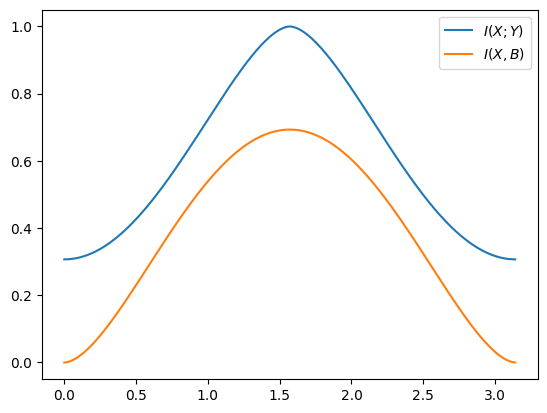

In [64]:
angles = np.arange(0, np.pi, 0.01)
mutual_info_xy = [I_xy(angle) for angle in angles]
mutual_info_xb = [I_xb(angle) for angle in angles]


plt.plot(angles, mutual_info_xy, label=r"$I(X;Y)$")
plt.plot(angles, mutual_info_xb, label=r"$I(X,B)$")
plt.legend()
plt.show()